<a href="https://colab.research.google.com/github/melaniehsieh/covid19/blob/main/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving HK.csv to HK.csv


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

%matplotlib inline

In [3]:
dataset = pd.read_csv("HK.csv")

hk = pd.DataFrame({"Date":[],"Cases":[]})
hk["Date"] = dataset.iloc[:, 0].values
hk["Cases"] = dataset.iloc[:, 1].values
hk["Cases"] = hk["Cases"].fillna(method='ffill')

dates = hk.Date
cases = hk.Cases

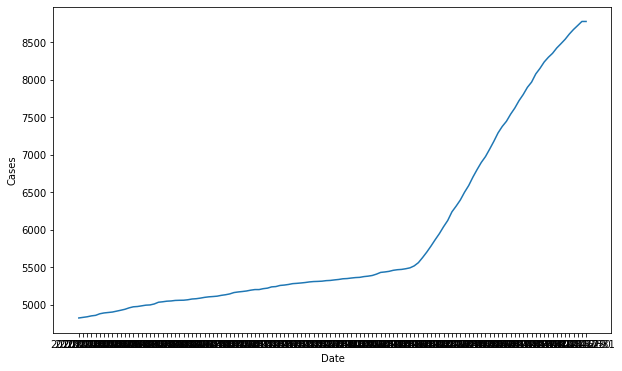

In [4]:
plt.figure(figsize = (10, 6))
plt.plot(dates, cases)
plt.xlabel('Date')
plt.ylabel('Cases')

plt.show()

In [5]:
confirmed = np.array([int(i) for i in cases]).reshape(-1, 1)

confirmed_total = cases.tail(1)

days = np.array([i for i in range(len(dates))]).reshape(-1, 1)

In [6]:
days_future = 1
future_forecast_days = np.array([i for i in range(len(dates) + days_future)]).reshape(-1, 1)
adjusted_dates = future_forecast_days[:-1]

In [7]:
import datetime

start_date = datetime.datetime.strptime('2020-09-01', '%Y-%m-%d')
future_forecaste_dates = []

for i in range(len(future_forecast_days)):
  future_forecaste_dates.append((start_date + datetime.timedelta(days=i)).strftime('%Y-%m-%d'))

In [8]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import operator

In [9]:
kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel':kernel, 'C':c, 'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv=3, return_train_score=True, 
                                n_jobs=-1, n_iter=30, verbose=1)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days, confirmed, test_size=0.15, shuffle=False)

In [10]:
svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  4.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=30, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [11]:
svm_confirmed = svm_search.best_estimator_
svm_prediction = svm_confirmed.predict(future_forecast_days)

print(svm_confirmed)
print(svm_prediction)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)
[4986.93760276 4986.93947773 4986.95260255 4986.98822705 4987.05760107
 4987.17197447 4987.34259708 4987.58071874 4987.89758929 4988.30445858
 4988.81257646 4989.43319275 4990.17755731 4991.05691997 4992.08253059
 4993.265639   4994.61749502 4996.14934855 4997.87244936 4999.79804737
 5001.93739235 5004.30173418 5006.9023227  5009.75040774 5012.85723915
 5016.23406681 5019.89214045 5023.84271004 5028.09702543 5032.66633626
 5037.56189266 5042.7949442  5048.37674089 5054.3185326  5060.63156907
 5067.3271001  5074.41637561 5081.91064557 5089.82115965 5098.1591677
 5106.93591952 5116.16266502 5125.85065414 5136.01113656 5146.65536232
 5157.79458105 5169.44004261 5181.602997   5194.2946939  5207.52638324
 5221.3093152  5235.65473872 5250.5739043  5266.07806191 5282.17846098
 5298.88635182 5316.21298414 5334.16960671 5352.76747081 5372.01782542
 539

In [12]:
svm_search_2 = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv=3, return_train_score=True, 
                                n_jobs=-1, n_iter=10, verbose=1)

In [13]:
start_date = datetime.datetime.strptime(np.array(dates)[0], '%Y-%m-%d')
last_date = datetime.datetime.strptime(np.array(dates)[-1], '%Y-%m-%d')
pred_date = last_date + datetime.timedelta(days=days_future)

start_date_str = start_date.strftime('%d %b, %Y')
last_date_str = last_date.strftime('%d %b, %Y')
pred_date_str = pred_date.strftime('%d %b, %Y')

In [14]:
ObservationDate_datetime = [datetime.datetime.strptime(i, '%Y-%m-%d') for i in future_forecaste_dates]
ObservationDate_datetime_str = [i.strftime('%d.%m') for i in ObservationDate_datetime]

In [15]:
def two_plots_ini(p1x, p1y, p2x, p2y, title, xlabel, ylabel):
  plt.figure(figsize=(10, 6))
  plt.plot(p1x, p1y)
  plt.plot(p2x, p2y, linestyle='dashed', color='red')
  plt.title(label=title, size=20)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.xticks(size=10, rotation = 'vertical')
  plt.yticks(size=10)

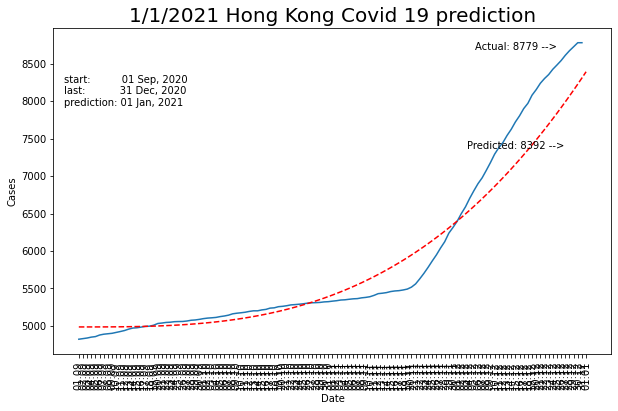

In [16]:
title = '1/1/2021 Hong Kong Covid 19 prediction'
two_plots_ini(adjusted_dates, cases, ObservationDate_datetime_str, svm_prediction, title, 'Date', 'Cases')

plt.figtext(x = 0.14, y = 0.70, s = f'start:          {start_date_str}\nlast:           {last_date_str} \nprediction: {pred_date_str}')
plt.figtext(x = 0.71, y = 0.83, s = f'Actual: {int(np.array(cases)[-1])} -->')
plt.figtext(x = 0.70, y = 0.60, s = f'Predicted: {int(round(svm_prediction[-1]))} -->')

plt.show()